In [1]:
# Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [4]:
# import the citipy module.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities=[]
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for weather map API call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city
        
    #log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
    #Run an API request for each of the cities.
    try:
         #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
        
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate the Data Loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | codajas
Processing Record 5 of Set 1 | belyy yar
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | chara
Processing Record 9 of Set 1 | songkhla
Processing Record 10 of Set 1 | donskoye
Processing Record 11 of Set 1 | samarai
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | solnechnyy
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | ishigaki
Processing Record 18 of Set 1 | gladstone
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | karratha
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | victoria
Processing Reco

Processing Record 35 of Set 4 | san felipe
Processing Record 36 of Set 4 | castro
Processing Record 37 of Set 4 | safwah
City not found. Skipping...
Processing Record 38 of Set 4 | jumla
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | kirkenaer
Processing Record 41 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 4 | carnarvon
Processing Record 43 of Set 4 | namatanai
Processing Record 44 of Set 4 | buon me thuot
City not found. Skipping...
Processing Record 45 of Set 4 | smithers
Processing Record 46 of Set 4 | antofagasta
Processing Record 47 of Set 4 | pevek
Processing Record 48 of Set 4 | morant bay
Processing Record 49 of Set 4 | khatanga
Processing Record 50 of Set 4 | francistown
Processing Record 1 of Set 5 | dzilam gonzalez
Processing Record 2 of Set 5 | lokosovo
Processing Record 3 of Set 5 | iquique
Processing Record 4 of Set 5 | shubarkuduk
Processing Record 5 of Set 5 | kungurtug
Processing Record 6 of Set 5 | ribeira gr

Processing Record 24 of Set 8 | binzhou
Processing Record 25 of Set 8 | san julian
Processing Record 26 of Set 8 | faanui
Processing Record 27 of Set 8 | aswan
Processing Record 28 of Set 8 | makung
City not found. Skipping...
Processing Record 29 of Set 8 | mao
Processing Record 30 of Set 8 | necochea
Processing Record 31 of Set 8 | isangel
Processing Record 32 of Set 8 | ilulissat
Processing Record 33 of Set 8 | mayahi
Processing Record 34 of Set 8 | ransang
Processing Record 35 of Set 8 | taltal
Processing Record 36 of Set 8 | sazonovo
Processing Record 37 of Set 8 | gamba
Processing Record 38 of Set 8 | changtu
Processing Record 39 of Set 8 | pampas
Processing Record 40 of Set 8 | seybaplaya
Processing Record 41 of Set 8 | yar-sale
Processing Record 42 of Set 8 | boromo
Processing Record 43 of Set 8 | lamar
Processing Record 44 of Set 8 | kambove
Processing Record 45 of Set 8 | sao joao da ponte
Processing Record 46 of Set 8 | tiarei
Processing Record 47 of Set 8 | pemangkat
Proces

Processing Record 11 of Set 12 | erdenet
Processing Record 12 of Set 12 | zharkovskiy
Processing Record 13 of Set 12 | banepa
Processing Record 14 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 15 of Set 12 | tingi
Processing Record 16 of Set 12 | san rafael
Processing Record 17 of Set 12 | baherden
Processing Record 18 of Set 12 | lasa
Processing Record 19 of Set 12 | sibolga
Processing Record 20 of Set 12 | chingirlau
Processing Record 21 of Set 12 | saint-joseph
Processing Record 22 of Set 12 | elbistan
Processing Record 23 of Set 12 | padampur
Processing Record 24 of Set 12 | trapani
Processing Record 25 of Set 12 | kedrovyy
Processing Record 26 of Set 12 | vilyuysk
Processing Record 27 of Set 12 | warqla
City not found. Skipping...
Processing Record 28 of Set 12 | chunskiy
Processing Record 29 of Set 12 | gusau
Processing Record 30 of Set 12 | ponta delgada
Processing Record 31 of Set 12 | rongcheng
Processing Record 32 of Set 12 | bansko
Processing Record 33

In [10]:
len(city_data)

565

In [11]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.29,72,60,11.14,PF,2022-07-26 22:55:22
1,Bluff,-46.6000,168.3333,44.80,90,100,21.25,NZ,2022-07-26 22:55:22
2,Mar Del Plata,-38.0023,-57.5575,55.09,98,100,8.05,AR,2022-07-26 22:55:23
3,Codajas,-3.8367,-62.0569,82.80,52,25,1.19,BR,2022-07-26 22:53:17
4,Belyy Yar,53.6039,91.3903,50.86,100,40,2.24,RU,2022-07-26 22:55:23
5,Kapaa,22.0752,-159.3190,84.18,71,5,10.00,US,2022-07-26 22:54:58
6,Port Alfred,-33.5906,26.8910,64.74,45,14,7.52,ZA,2022-07-26 22:55:23
7,Chara,56.9064,118.2631,72.48,62,58,0.78,RU,2022-07-26 22:55:24
8,Songkhla,6.8333,100.6667,80.83,96,99,2.13,TH,2022-07-26 22:55:24
9,Donskoye,45.4552,41.9741,66.69,83,68,5.41,RU,2022-07-26 22:55:25


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-26 22:55:22,-23.1203,-134.9692,75.29,72,60,11.14
1,Bluff,NZ,2022-07-26 22:55:22,-46.6000,168.3333,44.80,90,100,21.25
2,Mar Del Plata,AR,2022-07-26 22:55:23,-38.0023,-57.5575,55.09,98,100,8.05
3,Codajas,BR,2022-07-26 22:53:17,-3.8367,-62.0569,82.80,52,25,1.19
4,Belyy Yar,RU,2022-07-26 22:55:23,53.6039,91.3903,50.86,100,40,2.24
5,Kapaa,US,2022-07-26 22:54:58,22.0752,-159.3190,84.18,71,5,10.00
6,Port Alfred,ZA,2022-07-26 22:55:23,-33.5906,26.8910,64.74,45,14,7.52
7,Chara,RU,2022-07-26 22:55:24,56.9064,118.2631,72.48,62,58,0.78
8,Songkhla,TH,2022-07-26 22:55:24,6.8333,100.6667,80.83,96,99,2.13
9,Donskoye,RU,2022-07-26 22:55:25,45.4552,41.9741,66.69,83,68,5.41


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [14]:
#Extract relevant fields from the dataframe for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
#Import the time module.
import time

# Get today's date.
today = time.strftime("%x")
today

'07/26/22'

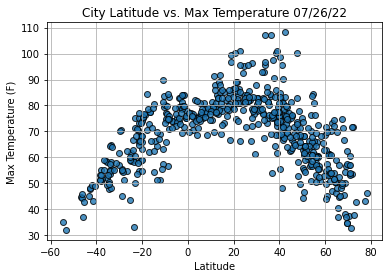

In [16]:
#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x") )
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

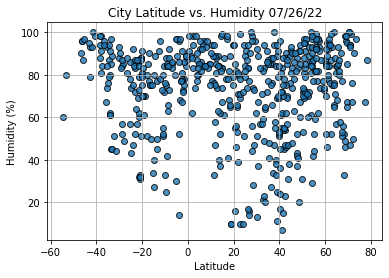

In [17]:
#Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Humidity " + time.strftime("%x") )
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

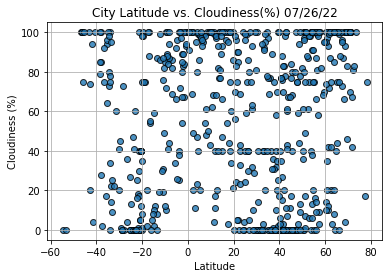

In [18]:
#Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Cloudiness(%) " + time.strftime("%x") )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

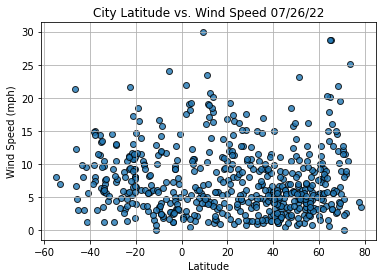

In [19]:
#Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x") )
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [20]:
#Import linear regression from the Scipy stats module.
from scipy.stats import linregress

In [21]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [22]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [23]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

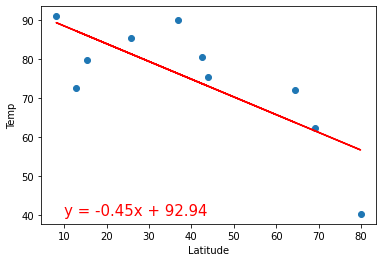

In [29]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

NameError: name 'title' is not defined

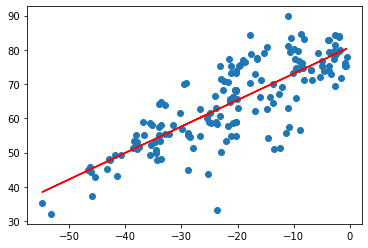

In [30]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                        Vaini
Country                        TO
Date          2022-07-26 22:55:26
Lat                         -21.2
Lng                        -175.2
Max Temp                    73.38
Humidity                       73
Cloudiness                    100
Wind Speed                  12.95
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
560     True
561     True
562    False
563    False
564     True
Name: Lat, Length: 565, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Belyy Yar,RU,2022-07-26 22:55:23,53.6039,91.3903,50.86,100,40,2.24
5,Kapaa,US,2022-07-26 22:54:58,22.0752,-159.3190,84.18,71,5,10.00
7,Chara,RU,2022-07-26 22:55:24,56.9064,118.2631,72.48,62,58,0.78
8,Songkhla,TH,2022-07-26 22:55:24,6.8333,100.6667,80.83,96,99,2.13
9,Donskoye,RU,2022-07-26 22:55:25,45.4552,41.9741,66.69,83,68,5.41


In [35]:
# Create Northern and Southern Hemisphere dataframes.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

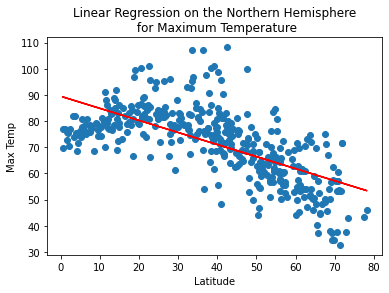

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Maximum Temperature", "Max Temp", (10,-20))

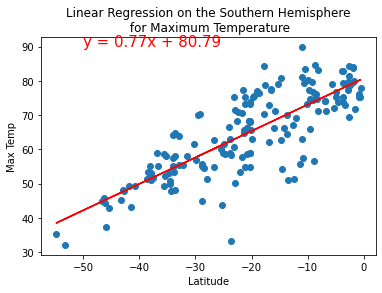

In [37]:
#Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Maximum Temperature", "Max Temp", (-50,90))

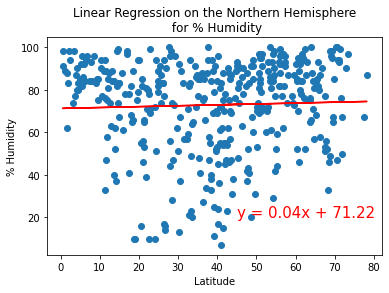

In [38]:
#linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Humidity", "% Humidity", (45,20))

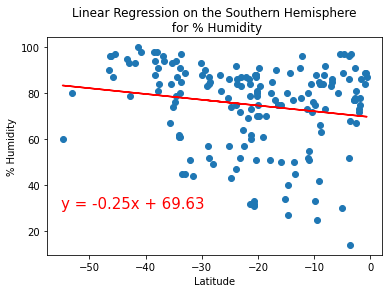

In [39]:
#Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for % Humidity", "% Humidity", (-55,30))

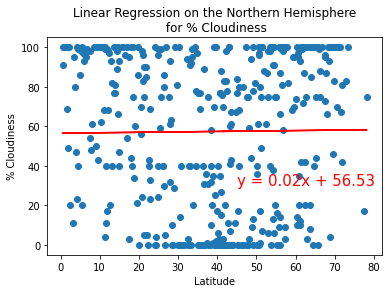

In [40]:
#linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Cloudiness", "% Cloudiness", (45,30))

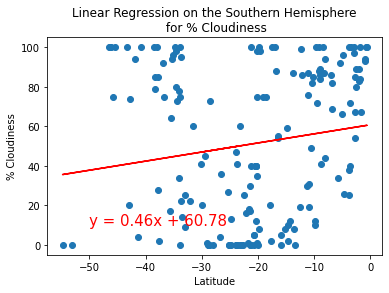

In [41]:
#Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for % Cloudiness", "% Cloudiness", (-50,10))

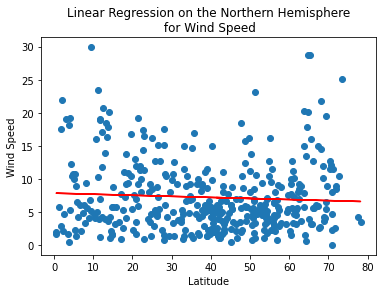

In [42]:
#linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values,y_values,
                       "Linear Regression on the Northern Hemisphere\n for Wind Speed", "Wind Speed", (10,60))

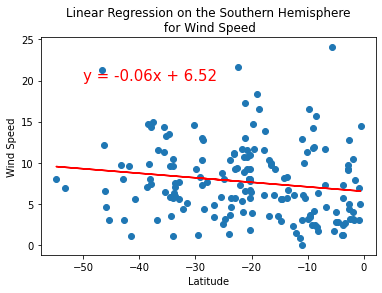

In [43]:
#Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Wind Speed", "Wind Speed", (-50,20))